In [1]:
import numpy as np
import os 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
import keras.backend as k
from keras.preprocessing.image import load_img
from PIL import Image
from keras.preprocessing import image
#from keras.preprocessing.image import Image

Using TensorFlow backend.


In [2]:
img_width=150
img_height=150

In [7]:
train='Tensorflow/Binary/train'
validate="Tensorflow/Binary/validate"
train_sample=150
validation_sample=50
epochs=20
batch_size=32

In [8]:
if k.image_data_format()=='channel_first':
    input_shape=(3,img_width,img_height)
else:
    input_shape=(img_width,img_height,3)

In [9]:
train_datagen=ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
train_generator=train_datagen.flow_from_directory(
                train,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                class_mode='binary')
val_generator=test_datagen.flow_from_directory(
                validate,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                class_mode='binary')

Found 390 images belonging to 2 classes.
Found 390 images belonging to 2 classes.


In [11]:
#make Neural Network
model=Sequential()
# This is the first convolution
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# The second convolution
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten the results to feed into a DNN
model.add(Flatten())
model.add(Dropout(0.5))
# 64 neuron hidden layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
________________________________________________

In [12]:
model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',metrics=['accuracy'])

In [13]:
model.fit_generator(train_generator,
                    steps_per_epoch=train_sample//batch_size,
                   epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=validation_sample//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
4/4 [==============================] - 5s 1s/step - loss: 2.7539 - accuracy: 0.5938 - val_loss: 0.6588 - val_accuracy: 0.6250
Epoch 2/20
4/4 [==============================] - 1s 329ms/step - loss: 0.6780 - accuracy: 0.5625 - val_loss: 0.7276 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 1s 350ms/step - loss: 0.7542 - accuracy: 0.4804 - val_loss: 0.6930 - val_accuracy: 0.4688
Epoch 4/20
4/4 [==============================] - 2s 499ms/step - loss: 0.6899 - accuracy: 0.6328 - val_loss: 0.6693 - val_accuracy: 0.6250
Epoch 5/20
4/4 [==============================] - 2s 388ms/step - loss: 0.6542 - accuracy: 0.5784 - val_loss: 0.5700 - val_accuracy: 0.6562
Epoch 6/20
4/4 [==============================] - 2s 475ms/step - loss: 0.5356 - accuracy: 0.5703 - val_loss: 0.6596 - val_accuracy: 0.6875
Epoch 7/20
4/4 [==============================] - 2s 380ms/step - loss: 0.6350 - accuracy: 0.6569 - val_loss: 0.537

In [ ]:
model.save_weights("BinaryWeights.h5")
model.save("Binary.h5")

In [16]:
#Prediction

In [24]:
#Load and evaluate a saved model
from keras.models import load_model

In [25]:
#Define Path
model_path = './BinaryWeights.h5'
model_weights_path = './Binary.h5'
test_path = 'Tensorflow/Binary/New/test'

In [26]:
#Load the pre-trained models
model = load_model('Binary.h5')
model.load_weights(model_weights_path)

In [27]:
#Define image parameters
img_width, img_height = 150, 150

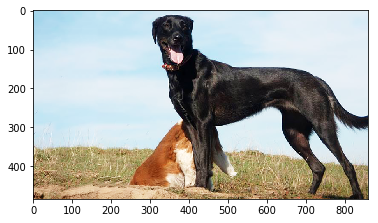

In [32]:
import matplotlib.pyplot as plt
img_pred=plt.imread('Tensorflow/Binary/New/test/dog1.png')
plt.imshow(img_pred)

In [34]:
img_pred=image.load_img('Tensorflow/Binary/New/test/dog1.png',target_size=(150,150))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

In [35]:
result=model.predict(img_pred)
finalresult=result[0][0]
print (finalresult)

1.0


In [36]:
if result[0][0]==1:
    prediction="Dog"
else:
    prediction="Cat"
print(prediction)

Dog
